# Sample Notebook for Katharina

In [3]:
# imports
from importlib import reload

import os
import numpy as np

import pandas
#import xarray
import h5py

from matplotlib import pyplot as plt
import seaborn as sns

from ulmo import io as ulmo_io
from ulmo import plotting
from ulmo.llc import io as llc_io
from ulmo.llc import plotting as llc_plotting

from ulmo.utils import image_utils
from ulmo.analysis import figures as ulmo_figs
from ulmo.plotting import plotting as ulmo_plotting

ModuleNotFoundError: No module named 'ulmo'

# LLC Table

## We will use pandas to load and hold the table of LLC analysis results

In [2]:
os.getenv('ENDPOINT_URL')

'https://s3.nautilus.optiputer.net'

In [4]:
#tbl_file = 's3://llc/Tables/test_noise_modis2012.parquet'
#  If s3 isn't working, you will need to use a copy of the file on your own computer
# e.g.
tbl_file = '/tank/xavier/Oceanography/AI/OOD/LLC/Tables/test_noise_modis2012.parquet'
llc_table = ulmo_io.load_main_table(tbl_file)

Read main table: /tank/xavier/Oceanography/AI/OOD/LLC/Tables/test_noise_modis2012.parquet


## View

### Most of the columns are described here: https://github.com/AI-for-Ocean-Science/ulmo/blob/main/ulmo/defs.py

In [5]:
llc_table.head()

,modis_lat,modis_lon,modis_col,modis_datetime,modis_LL,modis_row,clear_fraction,mean_temperature,Tmin,Tmax,...,field_size,pp_type,pp_idx,lat,lon,row,col,datetime,filename,LL
0,-52.410507,-42.126858,1028,2012-01-01 04:10:00,-147.370605,64,0.049805,4.124990,3.401999,6.411,...,64,0,487936,-52.406319,-42.135418,4687,17049,2012-01-01,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T00_00_...,124.020691
1,-52.194720,-42.787216,997,2012-01-01 04:10:00,-248.946106,48,0.043213,5.315350,3.464000,6.544,...,64,0,517068,-52.188812,-42.781250,4705,17018,2012-01-01,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T00_00_...,45.473206
2,-52.031720,-43.191420,976,2012-01-01 04:10:00,-264.156342,33,0.049500,5.912542,3.557000,6.852,...,64,0,58066,-52.031147,-43.197918,4718,16998,2012-01-01,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T00_00_...,159.249695
3,-51.908875,-42.702328,997,2012-01-01 04:10:00,-228.816925,16,0.018188,5.859069,3.442000,6.709,...,64,0,76355,-51.909538,-42.697918,4728,17022,2012-01-01,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T00_00_...,153.434143
4,-51.865665,-43.186947,974,2012-01-01 04:10:00,-260.829315,16,0.048279,6.131550,5.386000,6.852,...,64,0,523013,-51.860813,-43.177082,4732,16999,2012-01-01,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T00_00_...,148.887573


# Equatorial Pacific

## Let us isolate the cutouts in the Pacific near the equator with high LL

### Pacific

In [6]:
# This is a small piece
in_pacific = (llc_table.lon > -180.) & (llc_table.lon < -150.)

### Near Equator

In [7]:
near_equator = np.abs(llc_table.lat) < 10.

### high LL

In [8]:
highLL = llc_table.LL > 700.

In [9]:
sub_tbl = llc_table[in_pacific & near_equator & highLL]

In [10]:
sub_tbl.head()

,modis_lat,modis_lon,modis_col,modis_datetime,modis_LL,modis_row,clear_fraction,mean_temperature,Tmin,Tmax,...,field_size,pp_type,pp_idx,lat,lon,row,col,datetime,filename,LL
242,-3.130523,-161.63765,389,2012-01-01 12:10:00,495.246216,481,0.047668,26.224907,26.028000,26.751001,...,64,0,530983,-3.121485,-161.635422,7726,11313,2012-01-01 12:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T12_00_...,748.095520
245,-3.027235,-161.28703,421,2012-01-01 12:10:00,628.006470,464,0.006775,26.202333,25.963001,26.467001,...,64,0,593727,-3.025058,-161.281250,7731,11330,2012-01-01 12:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T12_00_...,741.925537
246,-2.980542,-161.60338,389,2012-01-01 12:10:00,593.781677,464,0.017761,26.206188,26.014000,26.705000,...,64,0,178174,-2.986482,-161.593750,7733,11315,2012-01-01 12:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T12_00_...,734.269653
247,-2.958587,-159.75120,581,2012-01-01 12:10:00,265.493408,432,0.025452,26.091520,25.874001,26.390001,...,64,0,480660,-2.967194,-159.760422,7734,11403,2012-01-01 12:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T12_00_...,730.128357
251,-2.820349,-161.72964,374,2012-01-01 12:10:00,463.220337,449,0.049866,26.193914,25.961000,26.466002,...,64,0,163933,-2.812861,-161.739578,7742,11308,2012-01-01 12:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T12_00_...,743.652771


In [11]:
len(sub_tbl)

2987

# Plot a few cutouts

## Grab the first one

In [12]:
cutout0 = sub_tbl.iloc[0]
cutout0

modis_lat                                                    -3.13052
modis_lon                                                    -161.638
modis_col                                                         389
modis_datetime                                    2012-01-01 12:10:00
modis_LL                                                      495.246
modis_row                                                         481
clear_fraction                                              0.0476685
mean_temperature                                              26.2249
Tmin                                                           26.028
Tmax                                                           26.751
T90                                                            26.373
T10                                                            26.114
modis_filename                   AQUA_MODIS.20120101T121008.L2.SST.nc
modis_UID                                           13258686951836235
pp_file             

### Image

In [14]:
# This uses s3
#img0 = llc_io.grab_image(cutout0)
# For a local file, use
local_preproc = '/tank/xavier/Oceanography/AI/OOD/LLC/PreProc/LLC_modis2012_test_noise_preproc.h5'
img0 = llc_io.grab_image(cutout0, local_file=local_preproc)

<AxesSubplot:>

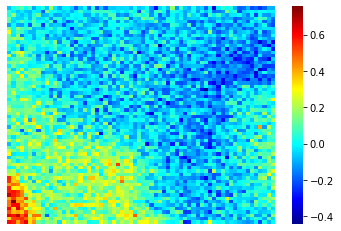

In [15]:
ulmo_plotting.show_image(img0)

## One more

<AxesSubplot:>

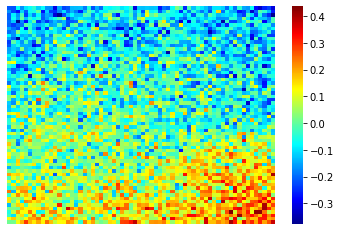

In [16]:
cutout100 = sub_tbl.iloc[100]
img100 = llc_io.grab_image(cutout100) # , local_file=local_preproc)
ulmo_plotting.show_image(img100)